# Lesson: working with netCDF data

Last week you learned how to use the basic features of the python language with the numpy and matplotlib libraries. The purpose of this lesson is to introduce you to most of the tools that you will use in the semester.

This is a very **dense** lesson. Please do it entirely and try to remember the principles. This code will provide a template for your own code, and you can always come back to these examples when you'll need them. I don't expect you to understand all details, but I do hope that you are going to catch the major lines. You will have to copy and adapt parts of the code below to complete the exercises.

Remember that I will never ask you to use tools you didn't use in a lesson before! <small> If this happens it was a mistake from my side, sorry!</small>

## More about the python syntax

### Python objects

In python, all variables are also "things". In the programming jargon, these "things" are called objects. Without going into details that you won't need for this lecture, objects have so-called "attributes" and "methods" (what you may know under the name "functions"). Attributes are information stored about the object.

For example, even simple integers are also "things with attributes":

In [1]:
# Let's define an interger
a = 1
# Get its attributes
print('The real part of a is', a.real)
print('The imaginary part of a is', a.imag)

The real part of a is 1
The imaginary part of a is 0


Attributes are read with a *dot*. They are very much like variables. In fact, they are variables:

In [2]:
ra = a.real
ra

1

Importantly, objects can also have functions that apply to them. For example, strings have a function called ``split()``:

In [3]:
s = 'This:is:a:splitted:example'
s_splitted = s.split(':')
print(s_splitted)

['This', 'is', 'a', 'splitted', 'example']


One difference between attributes and functions is that the functions are called with parentheses, and sometimes they require arguments (the ``':'`` in this case). Another difference between functions and variables is that the function is almost always returning you something back (yes, some functions return nothing, but they are rare).

Strings also have a ``join()`` method by the way:

In [4]:
' '.join(s_splitted)

'This is a splitted example'

It is not necessary to know the details about object oriented programming to use python (in fact, most of the time you don't need to implement these concepts yourselves). But it is important to know that you can have access to attributes and methods on almost *everything* in python.

## NetCDF data

Let's do some serious data crunching! 

First, let's import the tools we need. Remember why we need to import our tools? If not, ask Fabien! 

*Note: this can take a few seconds. On a normal system this is fast, but here the modules are imported from a network directory.*

### Imports and options

In [5]:
# Display the plots in the notebook:
%matplotlib inline
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size
np.set_printoptions(threshold=20)  # avoid to print very large arrays on screen

### Get the data 

The data we are going to use today is from the CERES (Clouds and the Earth's Radiant Energy System) mission. We are going to use the [EBAF-TOA](http://ceres.larc.nasa.gov/products.php?product=EBAF-TOA) and the [EBAF-Surface](http://ceres.larc.nasa.gov/products.php?product=EBAF-Surface) data products (both freeley available).

The easiest way if you are on the university computers is simply to read them directly from the online directory as shown below, but you can also get them from OLAT, or download it [here for TOA](https://www.dropbox.com/s/bz2jjq1tfkkglet/CERES_EBAF-TOA_Ed2.8_Avg-2001-2014.nc),  [here for Surface](https://www.dropbox.com/s/szji2yteblt5wd9/CERES_EBAF-Surface_Ed2.8_Avg-2001-2014.nc).

### Read the data

Most of today's meteorological data are stored in the NetCDF format (``*.nc``). NetCDF files are binary files, which means that you can't just open them in a text editor. You need a special reader for it. Nearly all the programming languages offer an interface to NetCDF. For this course we are going to use the [xarray](http://xarray.pydata.org/en/stable/) library to read the data:

In [6]:
# "ds" stands for "dataset". Of course you can give any name to your variables:
ds = xr.open_dataset('CERES_EBAF-TOA_Ed2.8_Avg-2001-2014.nc')

**Note**: you'll have to be on an university computer for the above to work. Alternatively, you can give an absolute path to the function, for example ``'C:\PATH\TO\FILE\CERES_EBAF-TOA_Ed2.8_Avg-2001-2014.nc'`` in windows.

In [7]:
# See what we have
ds

<xarray.Dataset>
Dimensions:         (lat: 180, lon: 360, month: 12)
Coordinates:
  * month           (month) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...
  * lat             (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 ...
  * lon             (lon) float32 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 ...
Data variables:
    toa_sw_all_mon  (month, lat, lon) float32 346.993 346.993 346.993 ...
    toa_lw_all_mon  (month, lat, lon) float32 187.379 187.379 187.379 ...
    toa_sw_clr_mon  (month, lat, lon) float32 343.6 343.6 343.6 343.6 343.6 ...
    toa_lw_clr_mon  (month, lat, lon) float32 188.786 188.786 188.786 ...
    solar_mon       (month, lat, lon) float32 494.957 494.957 494.957 ...
Attributes:
    title: CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Climatography of Monthly Averages (2001-2014).
    institution: NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions: CF-1.4
    comment: Downloaded and averaged by fabien.maussion@uibk.ac.at
    ver

The NetCDF dataset is constituted of various elements: Dimensions, Coordinates, Variables, Attributes:
- the dimensions specify the number of elements of each data coordinates, their name is chosen to be understandable and representative
- the attributes usually do not contain any data: they provide some information about the file
- the variables contain the actual data. In our file there is are five variables. All have the dimensions [month, lat, lon], so we can expect an array of size [12, 180, 360]
- the coordinates locate the data in space or time

### Coordinates 

Let's have a look at the **month** coordinate first:

In [8]:
ds.month

<xarray.DataArray 'month' (month: 12)>
array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.], dtype=float32)
Coordinates:
  * month    (month) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0

Month goes from 1 to 12, they are the months of the year. From the attribute "title", we know that these represent the average for each month for the period 2001-2014.

The **location coordinates** are also self explaining:

In [9]:
ds.lon

<xarray.DataArray 'lon' (lon: 360)>
array([-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5], dtype=float32)
Coordinates:
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...
Attributes:
    long_name: longitude
    standard_name: longitude
    units: degrees_east
    valid_range: [-180.  360.]

In [10]:
ds.lat

<xarray.DataArray 'lat' (lat: 180)>
array([-89.5, -88.5, -87.5, ...,  87.5,  88.5,  89.5], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
Attributes:
    long_name: latitude
    standard_name: latitude
    units: degrees_north
    valid_range: [-90.  90.]

**Q: what is the spatial resolution of CERES data?**

In [11]:
# your answer here

### Variables 

Variables can also be accessed directly from the dataset:

In [12]:
ds.toa_sw_all_mon

<xarray.DataArray 'toa_sw_all_mon' (month: 12, lat: 180, lon: 360)>
[777600 values with dtype=float32]
Coordinates:
  * month    (month) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...
Attributes:
    long_name: Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions
    standard_name: TOA Shortwave Flux - All-Sky
    CF_name: toa_outgoing_shortwave_flux
    IPCC_name: none
    units: W m-2
    valid_min:       0.00000
    valid_max:       600.000

The **attributes** of a variable are extremely important, they cary the *metadata* and must be specified by the data provider. Here we can read in which units the variable is defined, as well as a description of the variable (the "long_name" attribute).

**Q: what other informations can we read from this printout? Explore the other data variables and see if you understand all of them.**

In [13]:
# your answer here

## Simple analyses 

Analysing climate data is extremely easy in Python thanks to the [xarray](http://xarray.pydata.org/en/stable/) and [cartopy](http://scitools.org.uk/cartopy/docs/latest/index.html) libraries. First we are going to compute the time average of the TOA Shortwave Flux over the year:

In [14]:
sw_avg = ds.toa_sw_all_mon.mean(dim='month')

What did we just do? From the netcdf dataset, we took the toa_sw_all_mon variable (``ds.toa_sw_all_mon``) and we applied the function `.mean()` to it. So an equivalent formulation could be:

In [15]:
# Equivalent code:
sw = ds.toa_sw_all_mon
sw_avg = sw.mean(dim='month')

What is ``sw_avg`` by the way?

In [16]:
sw_avg

<xarray.DataArray 'toa_sw_all_mon' (lat: 180, lon: 360)>
array([[ 122.3019104 ,  122.3019104 ,  122.3019104 , ...,  122.3019104 ,
         122.3019104 ,  122.3019104 ],
       [ 123.62374878,  123.62374878,  123.62374878, ...,  123.42844391,
         123.42844391,  123.42844391],
       [ 120.10028076,  120.10028076,  120.10028076, ...,  120.12111664,
         120.12111664,  120.12111664],
       ..., 
       [ 102.8621521 ,  102.8621521 ,  102.8621521 , ...,  102.83596039,
         102.83596039,  102.83596039],
       [ 102.84844971,  102.84844971,  102.84844971, ...,  102.86676788,
         102.86676788,  102.86676788],
       [ 103.09085846,  103.09085846,  103.09085846, ...,  103.09085846,
         103.09085846,  103.09085846]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...

So `sw_avg` is a 2-dimensional array of dimensions [lat, lon] (note that the month dimension has disapeared).

When we applied the `mean()` function, we added an argument (called a **keyword argument**): ``dim='month'``. With this argument, we told the function to compute the average *over the month dimension*.

Let's remove this keyword and compute the mean again:

In [17]:
sw.mean()

<xarray.DataArray 'toa_sw_all_mon' ()>
array(102.55677032470703)

Ha! We now have an array without dimensions: a single element array, also called a **scalar**. This is the total average over all the dimensions. We'll come back to this later...

**Q: what should we expect from the flowing commands:**

    sw.mean(dim='lon')
    sw.mean(dim='month').mean(dim='lon')
    sw.mean(dim=['month', 'lon'])
    
**Try them out!**

In [18]:
# Try the commands above. Do they work as expected? 

**E: what is the maximum shortwave radiation value radiated back to space? And the minimum?** ([hint](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.min.html))

In [19]:
# your answer here

## A first plot 

### 2d data

We are now going to plot the average Top of The Atmosphere Shortwave Flux on a map:

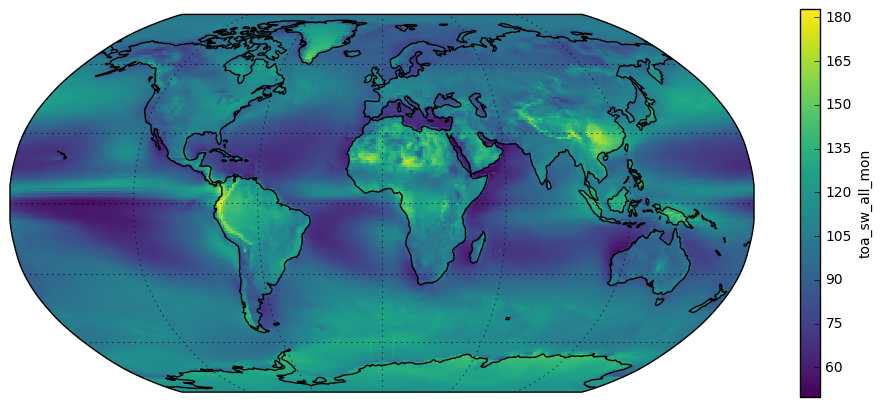

In [20]:
# Define the map projection
ax = plt.axes(projection=ccrs.Robinson())
# ax is an empty plot. We now plot the variable sw_avg onto ax
sw_avg.plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
ax.coastlines(); ax.gridlines(); # Add gridlines and coastlines to the plot

We are looking at the average TOA outgoing shorwage flux, expressed in W m$^{-2}$. Such time averages are often writen with a bar on top of them:

$\overline{SW_{TOA}} = temporal\_mean(SW_{TOA})$

**Q: look at the basic features of the plot. Can you explain most of the patterns that you observe? Where are the highest values? The lowest ones?**

### 1d data

It is equally easy to plot 1d data. In this case, we are going to compute the zonal average of ``sw_avg``. "Zonal average" means "along a latitude circle". It is often writen with ``[]`` or ``<>`` in formulas:

$\left[ \overline{SW_{TOA}} \right] = zonal\_mean(temporal\_mean(SW_{TOA}))$

Note that the two operators are commutative, i.e.:

$\left[ \overline{SW_{TOA}} \right] = \overline{\left[ SW_{TOA} \right]}$

Let's compute it and plot it right away:

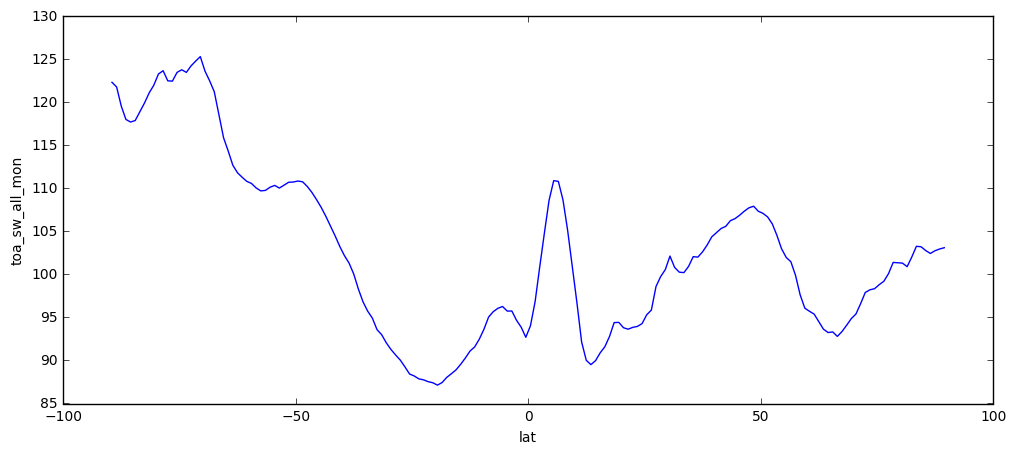

In [21]:
sw_avg.mean(dim='lon').plot();

**Q: look at the basic features of the plot. Can you recognize the important features from the map above?**

## More data manipulation with xarray 

As you have probably noted already, xarray's objects (called Dataset for the whole netCDF file or DataArray for single variables) are quite powerful, and can do more than much arrays know from other languages. Last week we talked about the differences between python's lists and numpy's arrays. Today we introduced this new object (DataArray) which is one level higher in usability.

But don't worry if this sounds confusing at first! From now on we are going to use DataArrays only. The best thing about them is that they carry their dimension names and coordinates with them. This is the reason why it was so easy to make a plot with the right axis labels in just one command. They have very useful other properties, and we will learn these step by step.

One of the first nice properties they have is that they behave just like regular arrays. That is, you can do arithmetic with them. Our first task will be to compute the net energy balance at the top of the atmosphere:

<img src="http://ceres.larc.nasa.gov/images/Energy-Balance.png" width="30%"  align="left">
$$\overline{EB_{TOA}} = \overline{SW_{In}} - \overline{SW_{TOA}} - \overline{LW_{TOA}} \approx 0$$

### Arithmetics and averages on a sphere

In [22]:
# Note that there are many different ways to get to the same result. For the sake of clarity we use the simple way:
eb_avg = ds.solar_mon.mean(dim='month') - ds.toa_sw_all_mon.mean(dim='month') - ds.toa_lw_all_mon.mean(dim='month')

**E: plot eb_avg on a map. Why did xarray chose to use another colormap? Describe the basic features of the plot. Where is the climate system gaining energy? Losing energy?** 

In [23]:
# your answer here

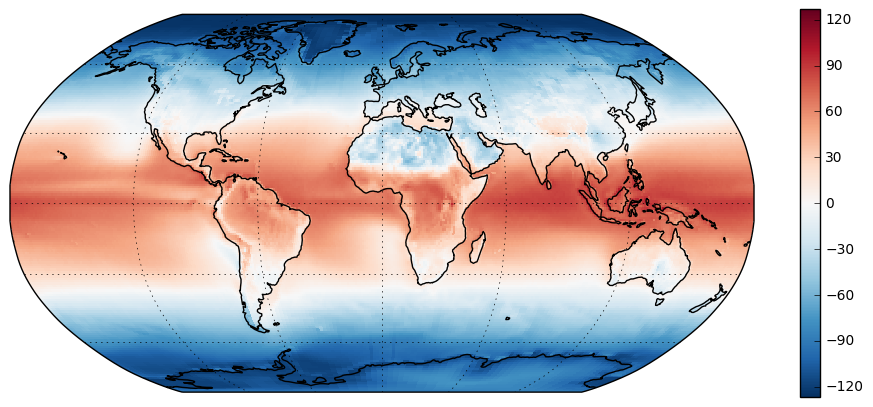

In [24]:
ax = plt.axes(projection=ccrs.Robinson())
eb_avg.plot(ax=ax, transform=ccrs.PlateCarree()) 
ax.coastlines(); ax.gridlines(); 

We said that the energy balance should be close to zero (balanced). Fortunately, it is easy to check:

In [25]:
eb_avg.mean()

<xarray.DataArray ()>
array(-28.588796615600586)

But, wait? This is quite far from zero!!! What's going on here?

Well, it's simpler than it seems. This is an anoying problem with our planet: it happens to be a sphere. (Or something close to a sphere).

So when we average without taking this into account, we get wrong results. How wrong is it? A regular plot of the data will help us to see what happens here:

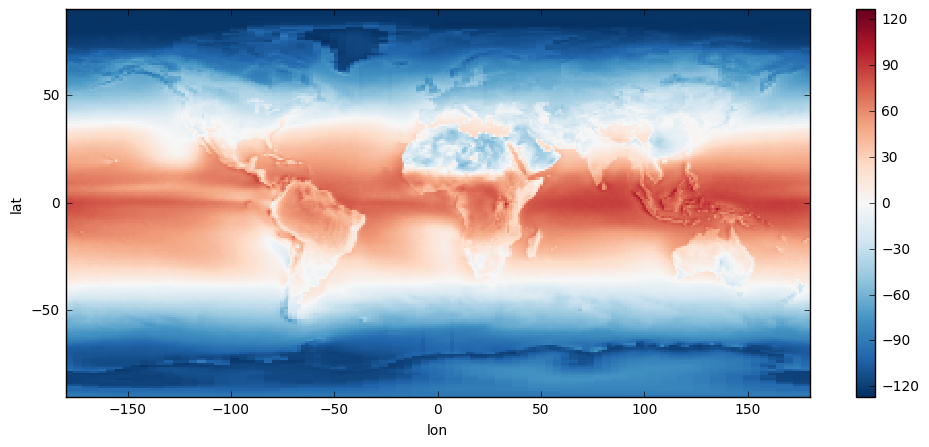

In [26]:
eb_avg.plot();

Which has to be compared to a sphere. When averaging [lon, lat] data, one gives too much weight to high latitudes.

Fortunately, this can be solved by noting that we have to weight each latitudinal band by the cosinus of the latitude, i.e. $\cos \varphi$. We are going to compute a new average, but [weighted](https://en.wikipedia.org/wiki/Weighted_arithmetic_mean) this time. First, let's make a weight array:

In [40]:
weight = np.cos(np.deg2rad(ds.lat))
weight = weight / weight.sum()

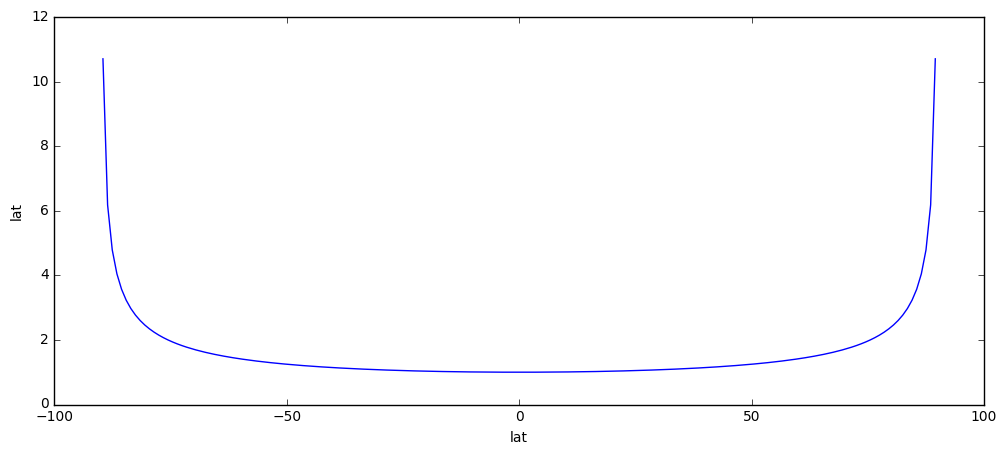

In [38]:
np.sqrt(weight).plot();

**Q: can you follow each step? If not, redo each step one by one, and use the ? to get help about each of these functions!**

In [34]:
# your answer here

Weight is an array of 180 elements, which is normalised so that it's sum is 1. This is exactly what we need to compute a weighted average! First, we have to average over the longitudes (this is fine, because along a latitude circle all points have the same weight), and then compute the weighted average.

In [35]:
zonal_eb_avg = eb_avg.mean(dim='lon')  # important! Always average over longitudes first
# this averaging is needed so that the arithmetic below makes sense (multiply two arrays of 180 elements together)
weighted_eb_avg = np.sum(zonal_eb_avg * weight)
weighted_eb_avg

<xarray.DataArray ()>
array(0.8409410755049066)

Aaaah, this looks much better now. Not exactly zero, but much closer. The remaining value (called the residual) is a combination of [measurement errors](http://ceres.larc.nasa.gov/science_information.php?page=EBAFbalance), geometrical approximations, and (possibly) a little bit of anthropogenic energy imbalance.

### Data selection and multiline plots

We have seen that DataArrays can be averaged along one dimension as following:

In [ ]:
eb_lon_avg = ds.solar_mon.mean(dim='lon')
eb_lon_avg

The resulting array has dimensions (month, lat). One of the things we'd like to do is select certain months for example, which is an easy task with xarray and the method ``.sel()``:

In [ ]:
avg_jan = eb_lon_avg.sel(month=1)

**E: plot avg_jan to make sure that it is indeed what you think it is.**

In [ ]:
# your answer here

With the help of a few commands, it is not a big deal to make a nice looking plot:

In [ ]:
eb_lon_avg.sel(month=1).plot(label='January')
eb_lon_avg.sel(month=7).plot(label='July')
eb_lon_avg.mean(dim='month').plot(label='Annual Avg', linewidth=3)
plt.xlim(-90, 90)
plt.title('Incoming solar radiation - zonal average')
plt.legend(loc='best')
plt.ylabel('W m$^{-2}$');